## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## Thu thập dữ liệu

Trong bài này, ta sẽ dùng dữ liệu đã được thu thập sẵn là file "Adidas Vs Nike.csv" đính kèm; Adidas vs Nike là một cuộc cạnh tranh không ngừng trong ngành công nghiệp thể thao. Tập dữ liệu này bao gồm thông tin sản phẩm của hai công ty khổng lồ này với những thông tin quan trọng. Dữ liệu này được lấy từ trang Kaggle, và gốc của dữ liệu là [ở đây](https://data.world/data-hut/product-data-from-nike) (Nike) và
[ở đây](https://data.world/data-hut/product-data-from-adidas) (Adidas).


---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
df = pd.read_csv("Adidas Vs Nike.csv")
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
print('Số dòng: ',df.shape[0])
print('Số cột: ',df.shape[1])

Số dòng:  3268
Số cột:  10


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo quan sát sơ bộ về dữ liệu thì mỗi dòng là thông tin của một sản phẩm. Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không?

In [4]:
num_duplicated_rows = df.duplicated().sum()
if num_duplicated_rows == 0:
    print('Không có dòng nào bị lặp')
else:
    print('Có {} dòng bị lặp'.format(num_duplicated_rows))

Không có dòng nào bị lặp


### Mỗi cột có ý nghĩa gì?

- **Product Name**: Tên sản phẩm.
- **Product ID**: Id sản phẩm.
- **Listing Price**: Giá niêm yết.
- **Sale Price**: Giá bán.
- **Discount**: Giảm giá.
- **Brand**: Nhãn hiệu.
- **Description**: Mô tả.
- **Rating**: Đánh giá.
- **Reviews**: Số lượt nhận xét
- **Last Visited**: Thời điểm ghi nhận dữ liệu.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
df.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Last Visited      object
dtype: object

**Cột có dtype là object nghĩa là sao?**

In [6]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes

In [7]:
cate_col_df = df.select_dtypes(include='object').columns
type_col = []
for col in cate_col_df:
    type_col.append(open_object_dtype(df['Product Name']))
pd.DataFrame({'Column':cate_col_df, 'Type':type_col})

,Column,Type
0,Product Name,{<class 'str'>}
1,Product ID,{<class 'str'>}
2,Brand,{<class 'str'>}
3,Description,{<class 'str'>}
4,Last Visited,{<class 'str'>}


Các cột có vẻ như đã có kiểu dữ liệu hợp lý. Riêng cột Last Visited nên ở dạng datetime. Để có thể tiếp tục khám phá thêm về cột này, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.

## Tiền xử lý

### Chuyển dtype của cột "Last Visited" sang datetime

In [8]:
df['Last Visited'] = pd.to_datetime(df['Last Visited'])

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Hiện có 6 cột có vẻ là thuộc nhóm numeric: 'Listing Price','Sale Price','Discount','Rating','Reviews','Last Visited'
Với các cột này, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

In [9]:
num_col_df = df.select_dtypes(exclude='object').columns
num_df = df[num_col_df]
#num_df = df[['Listing Price','Sale Price','Discount','Rating','Reviews']]
def missing_ratio(s):
    return (s.isna().mean() * 100)
def median(df):
    return df.quantile(0.5)
def lower_quartile(df):
    return df.quantile(0.25)
def upper_quartile(df):
    return df.quantile(0.75)
num_col_info_df = num_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])
num_col_info_df

,Listing Price,Sale Price,Discount,Rating,Reviews,Last Visited
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,449.0,0.0,0.0,0.0,2020-04-13 15:06:14
lower_quartile,4299.0,2999.0,0.0,2.6,10.0,2020-04-13 15:06:47
median,5999.0,4799.0,40.0,3.5,37.0,2020-04-13 15:07:20
upper_quartile,8999.0,7995.0,50.0,4.4,68.0,2020-04-13 15:07:53
max,29999.0,36500.0,60.0,5.0,223.0,2020-04-13 15:42:57


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Hiện có 4 cột có vẻ là thuộc nhóm categorical: 'Product Name','Product ID','Brand','Description'. Với các cột này ta sẽ tính:
- Tỉ lệ % giá trị thiếu (từ 0 đến 100)
- Số lượng giá trị khác nhau
- List các giá trị khác nhau

In [10]:
cate_col_df = df.select_dtypes(include='object').columns
cate_df = df[cate_col_df]
def missing_ratio(s):
    return (s.isna().mean() * 100)
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()

cate_col_profiles_df = cate_df.agg([missing_ratio, num_diff_vals, diff_vals])
#raise NotImplementedError()
cate_col_profiles_df

,Product Name,Product ID,Brand,Description
missing_ratio,0.0,0.0,0.0,0.091799
num_diff_vals,1531,3179,5,1762
diff_vals,[Women's adidas Originals NMD_Racer Primeknit ...,"[AH2430, G27341, CM0081, B44832, D98205, B7558...","[Adidas Adidas ORIGINALS, Adidas ORIGINALS, Ad...",[Channeling the streamlined look of an '80s ra...


### Vấn đề cần tiền xử lý:
* Xóa đi các dòng không có Rating

## Đưa ra các câu hỏi cần trả lời

### Với mỗi phân khúc sản phẩm thì Nike hay Adidas được đánh giá cao hơn?

Một mẫu câu hỏi mà chúng ta thường xuyên thấy trên diễn đàn, forum của các trang MXH là: "Với số tiền X thì nên mua sản phẩm của hãng nào?"

Do đó sẽ rất có ý nghĩa nếu chúng ta đặt ra câu hỏi rằng ở các phân khúc giá khác nhau thì Nike hay Adidas được đánh giá cao hơn? Để trả lời được câu hỏi này, ta cần thực hiến các bước sau
* Đầu tiên, chúng ta tạo thêm 2 cột là `Company` cho biết sản phẩm thuộc công ty nào và `Segmentation` cho biết sản phẩm thuộc phân khúc giá nào. Ở đây có chúng ta sẽ chia ra làm 4 phân khúc như sau `[0,1000)`,  `[1000,10000)`, `[10000,20000)`, `[20000,36500]`
* Tiếp theo, với mỗi hãng, ta sẽ thực hiện tính trung bình ratings của từng phân khúc (tiền xử lý cần xóa đi các sản phẩm không có review)

#### Đầu tiên là chia số sản phẩm theo phân khúc, sau đó tính trung bình review của các phân khúc đó. Visualize xem Nike và Adidas tập trung vào cái nào, với từng phấn khúc, sản phẩm của Nike hay Adidas được yêu thích hơn?

In [11]:
x = df
def f(values):
    if 'Adidas' in values['Brand']:
        return 'Adidas'
    return 'Nike'
x['Company'] = x.apply(f, axis = 1)

In [12]:
segm1 = range(0,1000)
segm2 = range(1000,10000)
segm3 = range(10000,20000)
segm4 = range(20000,x['Sale Price'].max())
def segmentation(value_of):
    if value_of['Sale Price'] in segm1:
        return 1
    if value_of['Sale Price'] in segm2:
        return 2
    if value_of['Sale Price'] in segm3:
        return 3
    return 4
x['Segmentation'] = x.apply(segmentation, axis = 1)

In [29]:
x = x[x['Reviews'] != 0]

tmpdf = x[['Company','Segmentation', 'Rating']]

mydf = tmpdf.groupby(['Company','Segmentation']).mean().reset_index()

mydf

,Company,Segmentation,Rating
0,Adidas,1,3.519672
1,Adidas,2,3.346756
2,Adidas,3,3.574519
3,Adidas,4,3.125000
4,Nike,2,4.173478
5,Nike,3,4.349425
6,Nike,4,4.180000


In [35]:
ii =mydf.set_index(['Company','Segmentation']).unstack(level = 0)
ii.columns = ii.columns.droplevel()
ii

Company,Adidas,Nike
Segmentation,,
1,3.519672,NaN
2,3.346756,4.173478
3,3.574519,4.349425
4,3.125000,4.180000


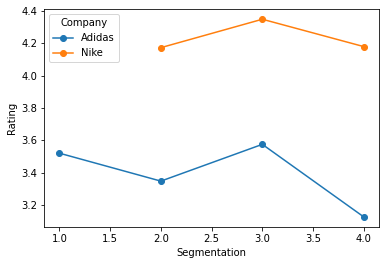

In [39]:
ii.plot(kind = 'line', use_index = True, marker = 'o',\
        xlabel = 'Segmentation', ylabel = 'Rating');

### Một câu khác là: Với số tiền X thì tôi nên mua cái giày nào? Hướng làm sẽ là tìm được khoảng tiền chứa số X đó. Sau đó thực hiện visualize trên khoảng đó. Vì tuơng quan sự thay đổi giá khác nhau trên toàn range nên sẽ áp hàm log vào mới tìm.

# Cái kiểu này tiếp theo là chuyển mấy cái Adidas với Nike thành 2 cột khác nhau để visualize cho dễ thấy. Cái đang làm là visualize số lượng chứ không phải trung bình reviews theo từng phân khúc. Mai phải sửa lại, thay cái counts bằng cái trung bình reviews

# Cần vẽ cái biểu đồ như link trong tin nhắn cá nhân

In [21]:
columns = ['col1','col2','avg']
df = pd.DataFrame(columns=columns)
df.loc[0] = [1,2,3]
df.loc[1] = [1,3,3]

In [22]:
df

,col1,col2,avg
0,1,2,3
1,1,3,3
